In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df1 = pd.read_csv('str_1.csv', delimiter=";")
df2 = pd.read_csv('str_2.csv', delimiter=";")
df = pd.concat([df1, df2])

In [4]:
df.shape

(9537, 11)

In [5]:
df.head()

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


In [6]:
df.columns

Index(['ID', 'protocol', 'browser_type', 'login_attempts', 'duration',
       'packet_size', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'unusual_time_access', 'attack'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, 0 to 7426
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9537 non-null   int64  
 1   protocol             9537 non-null   object 
 2   browser_type         9537 non-null   object 
 3   login_attempts       9409 non-null   float64
 4   duration             9537 non-null   float64
 5   packet_size          9537 non-null   int64  
 6   encryption_used      7571 non-null   object 
 7   ip_reputation_score  9537 non-null   float64
 8   failed_logins        9537 non-null   int64  
 9   unusual_time_access  9537 non-null   int64  
 10  attack               9537 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 894.1+ KB


In [8]:
df.describe(include='all')

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
count,9537.000000,9537,9537,9409.000000,9537.000000,9537.000000,7571,9537.000000,9537.000000,9537.000000,9537
unique,NaN,3,5,NaN,NaN,NaN,2,NaN,NaN,NaN,2
top,NaN,TCP,Chrome,NaN,NaN,NaN,AES,NaN,NaN,NaN,N
freq,NaN,6624,5137,NaN,NaN,NaN,4706,NaN,NaN,NaN,5273
mean,3124.823949,NaN,NaN,4.029971,792.745312,500.430639,NaN,0.331338,1.517773,0.149942,NaN
std,2209.075559,NaN,NaN,1.962595,786.560144,198.379364,NaN,0.177175,1.033988,0.357034,NaN
min,0.000000,NaN,NaN,1.000000,0.500000,64.000000,NaN,0.002497,0.000000,0.000000,NaN
25%,1192.000000,NaN,NaN,3.000000,231.953006,365.000000,NaN,0.191946,1.000000,0.000000,NaN
50%,2658.000000,NaN,NaN,4.000000,556.277457,499.000000,NaN,0.314778,1.000000,0.000000,NaN
75%,5042.000000,NaN,NaN,5.000000,1105.380602,635.000000,NaN,0.453388,2.000000,0.000000,NaN


In [41]:
filtro_ataques = df[df['attack'] =='Y']
encriptacion_ataques = filtro_ataques["encryption_used"].fillna("ND")
filtro_n_ataques = df[df['attack'] =='N']
encriptacion_n_ataques = filtro_n_ataques["encryption_used"].fillna("ND")



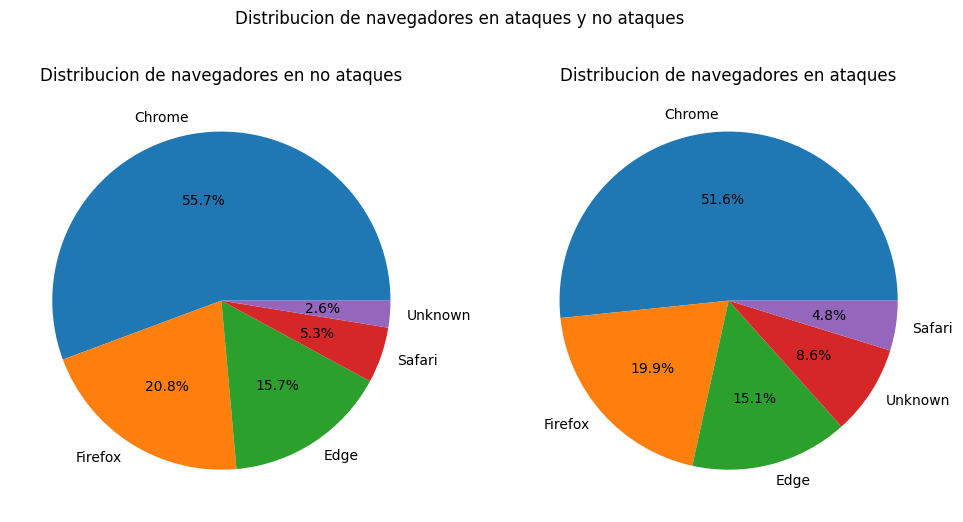

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribucion de navegadores en ataques y no ataques')

ax[0].set_title('Distribucion de navegadores en no ataques')
ax[0].pie(filtro_n_ataques['browser_type'].value_counts(), labels=filtro_n_ataques['browser_type'].value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Distribucion de navegadores en ataques')
ax[1].pie(filtro_ataques['browser_type'].value_counts(), labels=filtro_ataques['browser_type'].value_counts().index, autopct='%1.1f%%')
#print(filtro_ataques['browser_type'].value_counts())

plt.show()

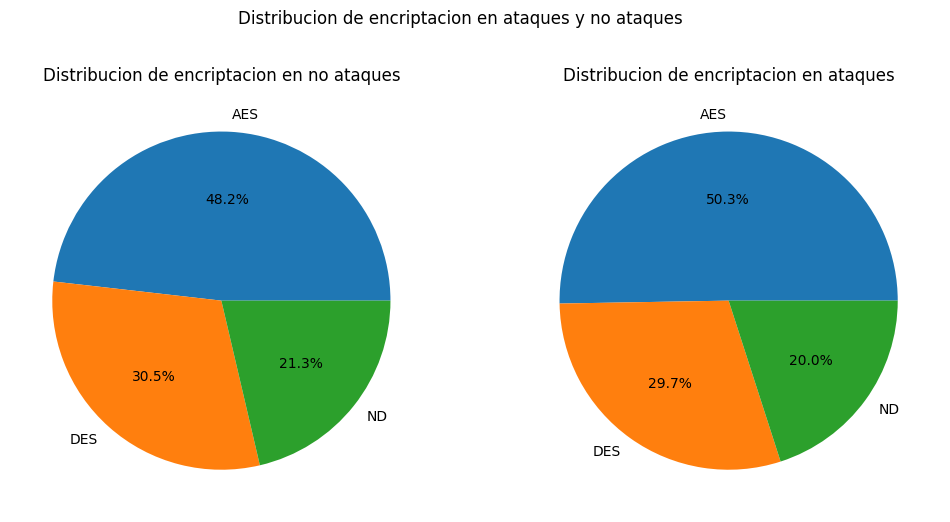

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribucion de encriptacion en ataques y no ataques')

ax[0].set_title('Distribucion de encriptacion en no ataques')
ax[0].pie(encriptacion_ataques.value_counts(), labels=encriptacion_ataques.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Distribucion de encriptacion en ataques')
ax[1].pie(encriptacion_n_ataques.value_counts(), labels=encriptacion_n_ataques.value_counts().index, autopct='%1.1f%%')
#print(filtro_ataques['browser_type'].value_counts())

plt.show()

In [10]:
filtro_ataques.describe(include="all")

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
count,4264.000000,4264,4264,4209.000000,4264.000000,4264.000000,3354,4264.000000,4264.000000,4264.000000,4264
unique,NaN,3,5,NaN,NaN,NaN,2,NaN,NaN,NaN,1
top,NaN,TCP,Chrome,NaN,NaN,NaN,AES,NaN,NaN,NaN,Y
freq,NaN,2963,2202,NaN,NaN,NaN,2055,NaN,NaN,NaN,4264
mean,3112.113743,NaN,NaN,4.633642,829.131980,498.931051,NaN,0.373015,1.935976,0.153377,NaN
std,2226.813841,NaN,NaN,2.268936,851.857703,199.308695,NaN,0.200488,1.184932,0.360393,NaN
min,0.000000,NaN,NaN,1.000000,0.500000,64.000000,NaN,0.002497,0.000000,0.000000,NaN
25%,1159.000000,NaN,NaN,3.000000,231.664142,361.000000,NaN,0.211048,1.000000,0.000000,NaN
50%,2630.500000,NaN,NaN,4.000000,559.358924,500.000000,NaN,0.347314,2.000000,0.000000,NaN
75%,5029.250000,NaN,NaN,6.000000,1166.808449,635.250000,NaN,0.525693,3.000000,0.000000,NaN


In [16]:
filtro_n_ataques.describe(include="all")

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
count,5273.000000,5273,5273,5200.000000,5273.000000,5273.000000,4217,5273.000000,5273.000000,5273.000000,5273
unique,NaN,3,5,NaN,NaN,NaN,2,NaN,NaN,NaN,1
top,NaN,TCP,Chrome,NaN,NaN,NaN,AES,NaN,NaN,NaN,N
freq,NaN,3661,2935,NaN,NaN,NaN,2651,NaN,NaN,NaN,5273
mean,3135.102029,NaN,NaN,3.541346,763.321311,501.643277,NaN,0.297636,1.179594,0.147165,NaN
std,2194.784387,NaN,NaN,1.506485,728.250219,197.635263,NaN,0.147434,0.736657,0.354304,NaN
min,1.000000,NaN,NaN,1.000000,0.500000,64.000000,NaN,0.007030,0.000000,0.000000,NaN
25%,1227.000000,NaN,NaN,2.000000,232.042818,368.000000,NaN,0.177466,1.000000,0.000000,NaN
50%,2674.000000,NaN,NaN,4.000000,554.069552,498.000000,NaN,0.293780,1.000000,0.000000,NaN
75%,5057.000000,NaN,NaN,5.000000,1066.236472,634.000000,NaN,0.412074,2.000000,0.000000,NaN


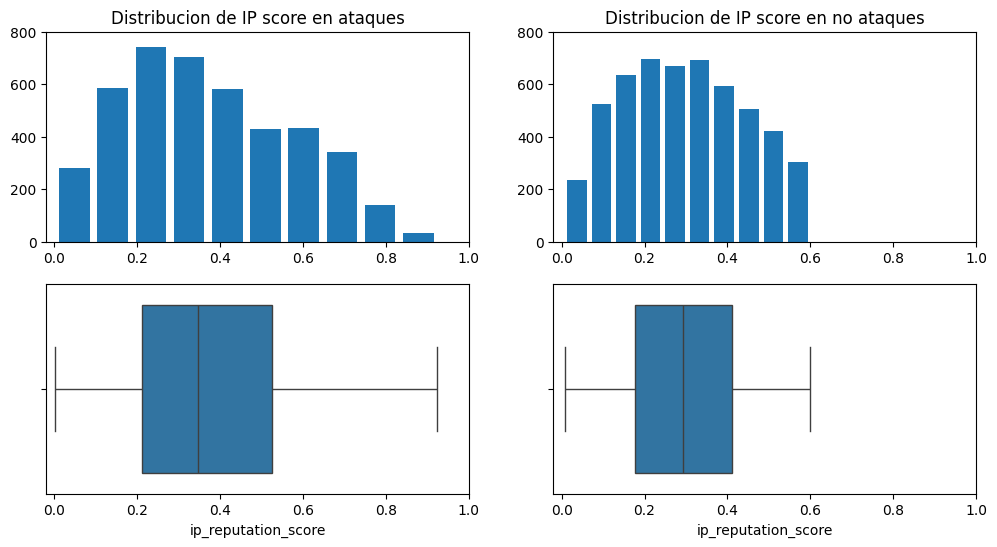

In [34]:
INF_X = -0.02
INF_Y = 0
SUP_X = 1
SUP_Y = 800
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('')

ax[0,0].set_ylim(INF_Y, SUP_Y)
ax[0,0].set_xlim(INF_X,  SUP_X)
ax[0,0].set_title('Distribucion de IP score en ataques')
ax[0,0].hist(filtro_ataques['ip_reputation_score'], bins=10, alpha=1, label='Ataques', rwidth=0.8)
ax[0,1].set_ylim(INF_Y, SUP_Y)
ax[0,1].set_xlim(INF_X,  SUP_X)
ax[0,1].set_title('Distribucion de IP score en no ataques')
ax[0,1].hist(filtro_n_ataques['ip_reputation_score'], bins=10, alpha=1, label='No ataques', rwidth=0.8)

sns.boxplot(x = filtro_ataques["ip_reputation_score"], ax=ax[1,0])
ax[1,0].set_xlim(INF_X,  SUP_X)
sns.boxplot(x = filtro_n_ataques["ip_reputation_score"], ax=ax[1,1])
ax[1,1].set_xlim(INF_X, SUP_X)

plt.show()

In [26]:
print("\t\tAtaque\t\t\t\tNo ataque")
print("Mediana \t", filtro_ataques["ip_reputation_score"].median(), "\t\t", filtro_n_ataques["ip_reputation_score"].median())
print("Media \t\t", filtro_ataques["ip_reputation_score"].mean(), "\t\t", filtro_n_ataques["ip_reputation_score"].mean())
print("Desviacion \t", filtro_ataques["ip_reputation_score"].std(), "\t\t", filtro_n_ataques["ip_reputation_score"].std())
print("Rango \t\t", filtro_ataques["ip_reputation_score"].max() - filtro_ataques["ip_reputation_score"].min(),
       "\t\t", filtro_n_ataques["ip_reputation_score"].max() - filtro_n_ataques["ip_reputation_score"].min())

		Ataque				No ataque
Mediana 	 0.3473143610523912 		 0.2937802757454712
Media 		 0.373014583069066 		 0.2976363214549331
Desviacion 	 0.2004877097690357 		 0.14743372815608502
Rango 		 0.9218023587889803 		 0.5926727313993998


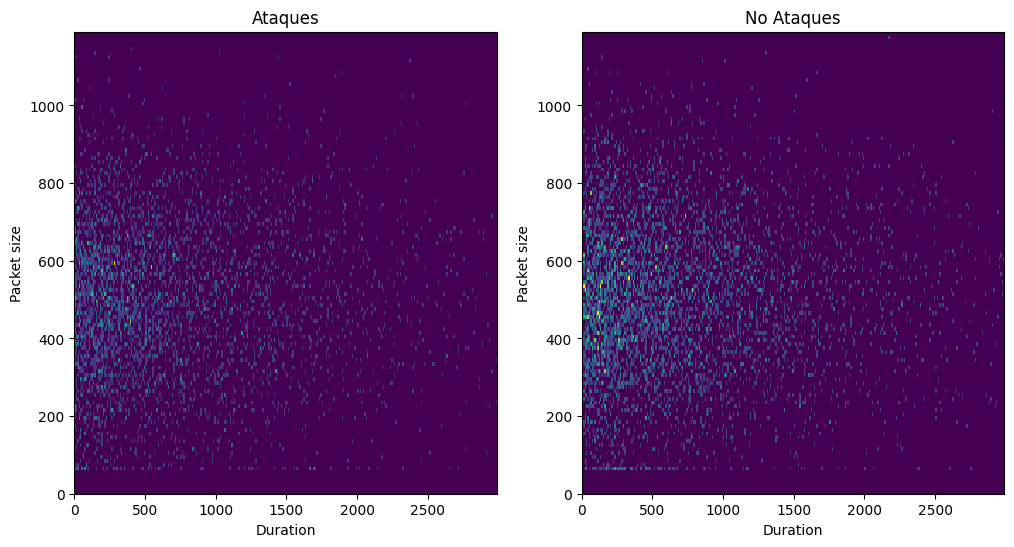

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist2d(filtro_ataques["duration"], filtro_ataques["packet_size"], bins=(np.arange(0, 3000, 10), np.arange(0, 1200, 10)))
ax[1].hist2d(filtro_n_ataques["duration"], filtro_n_ataques["packet_size"], bins=(np.arange(0, 3000, 10), np.arange(0, 1200, 10)))
ax[0].set_xlabel('Duration')
ax[0].set_ylabel('Packet size')
ax[0].set_title('Ataques')
ax[1].set_xlabel('Duration')
ax[1].set_ylabel('Packet size')
ax[1].set_title('No Ataques')

plt.show()
# duration + packet size hist2d